### Load cleaned data and pre-defined classes

In [43]:
from data_clean import Data_to_Clean,Data_to_Analyze
import pickle
import pandas as pd
import copy
import json

MBTI_types=[
    'istj', 'isfj', 'infj', 'intj', 
    'istp', 'isfp', 'infp', 'intp', 
    'estp', 'esfp', 'enfp', 'entp', 
    'estj', 'esfj', 'enfj', 'entj'
    ]
cleaned_data=dict.fromkeys(MBTI_types, None)

for type in cleaned_data.keys():
    file_path=f"Data\\cleaned_data\\{type}_cleaned.pkl" 
    try:
        with open(file_path, 'rb') as f:
            cleaned_data[type] = pickle.load(f)
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
    except pickle.UnpicklingError:
        print(f"Error: Could not unpickle the file {file_path}. It might be corrupted or not a valid pickle file.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")


In [44]:
infp=cleaned_data["infp"]
infp.data.head(30)


,posts,type,vader_score
0,"[[forest], [elizabeth], [holly], [fuss, fly, s...",infp,"{'neg': 0.028949367088607587, 'neu': 0.6760253..."
1,"[[submission, matchstickguy], [choose, matchst...",infp,"{'neg': 0.019292035398230087, 'neu': 0.5762212..."
2,"[[acceptable, minion, meme], [free, send], [bi...",infp,"{'neg': 0.10786956521739133, 'neu': 0.68515942..."
3,"[[fucking], [scremsing], [sayr], [aaaaaaaaaaaa...",infp,"{'neg': 0.0971764705882353, 'neu': 0.732007352..."
4,"[[mom, lose, weight], [worth, honest], [update...",infp,"{'neg': 0.12409740259740262, 'neu': 0.71883116..."
5,"[[follow, account], [felt, resonate, deep, sou...",infp,"{'neg': 0.077645, 'neu': 0.7014500000000002, '..."
6,"[[drake, album, straight, beach, drink], [twee...",infp,"{'neg': 0.09475000000000001, 'neu': 0.6663625,..."
7,"[[thread, chick, biz], [incels, relate], [hop,...",infp,"{'neg': 0.06881410256410259, 'neu': 0.68692948..."
8,"[[follow, unfollowed, automatically, check], [...",infp,"{'neg': 0.09469090909090912, 'neu': 0.68720909..."
9,"[[comfie], [nerd], [junior], [laugh, whay, ner...",infp,"{'neg': 0.11299408284023668, 'neu': 0.67594674..."


### Visualize VADER score of all MBTI types

In [45]:
mbti_identities={
    T:{
        k:cleaned_data[T].basic_identities[k]
        for k in [
        "ave_sentence_quantity",
        "ave_word_count",
        "ave_upper_ratio",
        "ave_reading_ease",
        "ave_GF_index"
        ]
    }
    for T in MBTI_types
}
mbti_identities=pd.DataFrame(mbti_identities).T
mbti_identities

,ave_sentence_quantity,ave_word_count,ave_upper_ratio,ave_reading_ease,ave_GF_index
istj,140.922780,1584.861004,0.125113,53.508301,16.561120
isfj,139.890110,1542.766484,0.139261,58.487995,14.762555
infj,136.120151,1662.837275,0.108945,59.505421,14.098761
intj,142.160051,1768.897567,0.111903,55.228515,15.652458
istp,142.599388,1439.327217,0.135959,50.868624,18.008930
isfp,138.239782,1468.850136,0.147333,51.682698,17.722262
infp,135.311232,1538.657566,0.133015,54.009626,16.649938
intp,138.747226,1557.081381,0.124319,50.273724,18.050296
estp,138.510000,1528.890000,0.144286,54.100900,16.754100
esfp,147.137931,1500.454023,0.157108,54.208218,16.571782


In [46]:
all_vader_scores={T:cleaned_data[T].basic_identities["overall_vader_score"] for T in MBTI_types}

In [47]:
all_vader_scores=pd.DataFrame(all_vader_scores).T

In [48]:
all_vader_scores=all_vader_scores.sort_values(by="compound",ascending=False)
all_vader_scores

,neg,neu,pos,compound
isfj,0.074714,0.706432,0.179305,0.156459
infj,0.077386,0.706724,0.171925,0.146350
enfj,0.077268,0.706996,0.172352,0.146079
estj,0.075952,0.715335,0.168221,0.135310
esfj,0.079053,0.708754,0.163387,0.126369
enfp,0.081753,0.717179,0.163048,0.125133
intj,0.078297,0.723588,0.157496,0.117230
infp,0.086349,0.708721,0.163746,0.113087
isfp,0.086260,0.709435,0.164908,0.108508
entj,0.082541,0.718532,0.157704,0.106751


In [49]:
all_vader_scores["compound"].describe()

count    16.000000
mean      0.113410
std       0.024352
min       0.076574
25%       0.093851
50%       0.110797
75%       0.128604
max       0.156459
Name: compound, dtype: float64

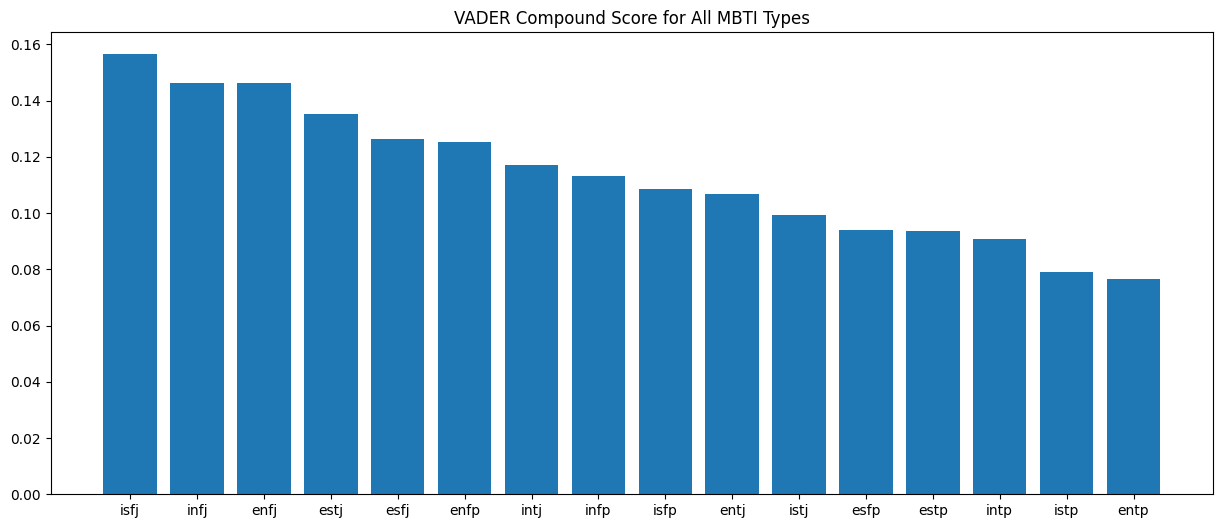

In [50]:
import matplotlib.pyplot as plt
x=all_vader_scores.index
y=all_vader_scores["compound"]
plt.figure(figsize=(15, 6))
plt.bar(x,y)
plt.title("VADER Compound Score for All MBTI Types")
plt.show()

In [51]:
# with open("Data/phrases.json",'r') as f:
#     phrases=json.load(f)
# phrases.keys()

In [52]:
# phrase_parts=set()
# for phrase in phrases.keys():
#     phrase_parts.update(phrase.split("_"))
# phrase_parts

### Construct a dictionary for LDA modeling

In [53]:
import gensim.corpora as corpora
from gensim.models import CoherenceModel
def constract_initial_dict():
    output = {T: {
        "corpus_overall": None,
        "corpus_specific": None,
        "original_text": [],
        "specific_initial_dict": None
    } for T in MBTI_types}
    def concatenate_post(post):
        complete_post=[]
        for sentence in post:
            complete_post.extend(sentence)
        return complete_post
    output["all_original_text"]=[]
    for T in MBTI_types:
        for i in cleaned_data[T].data.index:
            temp=concatenate_post(cleaned_data[T].data.loc[i,"posts"])
            # temp=[
            #     word for word in temp if word not in phrase_parts
            # ]
            cleaned_data[T].data.at[i,"posts"]=temp
            output[T]["original_text"].append(temp)
        output["all_original_text"].extend(output[T]["original_text"])
    # 这里加入N-gram过滤机制
    output["overall_initial_dict"]=corpora.Dictionary(output["all_original_text"])
    output["overall_initial_dict"].filter_extremes(no_above=0.2,no_below=50)
    output["overall_initial_dict"].compactify()
    print("Size of dictionary:",len(output["overall_initial_dict"]))
    output["all_corpus"]=[output["overall_initial_dict"].doc2bow(post_token) for post_token in output["all_original_text"]]
    return output
initial_dict=constract_initial_dict()
with open("Data/initial_dict.pkl",'wb') as f:
    pickle.dump(initial_dict,f)


Size of dictionary: 5613


In [54]:
def check_corpus(corpus,dict):
    result=pd.DataFrame(
        [
            list(range(len(dict))),
            [0]*len(dict)
        ]
    ).T
    result.columns=["word","frequency"]
    for post in corpus:
        for word_tuple in post:
            result.loc[word_tuple[0],"frequency"]+=word_tuple[1]
            #result.loc[word_tuple[0],"word"]=initial_dict["overall_initial_dict"][word_tuple[0]]
    for i in result.index:
        result.loc[i,"word"]=dict[i]
    result=result.sort_values(by="frequency",ascending=False)
    result.to_csv(r"Data\id2word_result.csv")
check_corpus(initial_dict["all_corpus"],initial_dict["overall_initial_dict"])

C:\Users\DominicMin\AppData\Local\Temp\ipykernel_32072\273948434.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'acct' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  result.loc[i,"word"]=dict[i]


In [24]:
initial_dict["overall_initial_dict"][266]

'community'

### Use LDA for topic modeling

In [25]:
with open("Data/initial_dict.pkl","rb") as f:
    initial_dict=pickle.load(f)
import gensim.corpora as corpora
import gensim
from tqdm import tqdm
from gensim.models import LdaMulticore,CoherenceModel

def optimize_topic_num(
  start,
  end,
  step,
  dict=initial_dict["overall_initial_dict"],
  corpus=initial_dict["all_corpus"],
  text=initial_dict["all_original_text"]      
):
  output=pd.Series({},dtype=float)
  topic_num_range = range(start, end+1, step)
  for topic_num in tqdm(topic_num_range, desc="计算全局模型主题数"):
  # 训练 LDA 模型 (在所有帖子数据上)
    temp_lda_model = LdaMulticore(
        corpus=corpus,    # 使用所有帖子的词袋语料
        id2word=dict,         # 使用全局词典
        num_topics=topic_num,
        random_state=100,
        chunksize=2500,
        passes=5,
        alpha="asymmetric",
        eta="auto",
        per_word_topics=False,
        workers=None                     
    )

    # 计算 Coherence (C_v) 分数 (评估全局模型在所有数据上的性能)
    temp_chmodel = CoherenceModel(
        model=temp_lda_model,
        texts=text,
        dictionary=dict,
        coherence="c_v"
    )
    output[topic_num] = temp_chmodel.get_coherence()
  print(output)
    

In [42]:
optimize_topic_num(15,27,2)

计算全局模型主题数:   0%|          | 0/7 [00:16<?, ?it/s]


KeyboardInterrupt: 

In [26]:
topics=23
lda_model = LdaMulticore(
    corpus=initial_dict["all_corpus"],
    id2word=initial_dict["overall_initial_dict"],
    num_topics=topics,
    random_state=100,
    chunksize=2500,
    passes=200,
    alpha="asymmetric",
    eta="auto",
    per_word_topics=False,
    workers=None,
    eval_every=10 # 每 10 次迭代计算一次困惑度/一致性，用于监控
)

In [ ]:
# Model evaluation
chmodel = CoherenceModel(
        model=lda_model,
        texts=initial_dict["all_original_text"],
        dictionary=initial_dict["overall_initial_dict"],
        coherence="c_v"
    )
cv=chmodel.get_coherence()
cv

'0.47067'

In [37]:
with open(f"output/lda_model/lda_{topics}_{str(cv)[2:6]}.pkl",'wb') as f:
    pickle.dump(lda_model,f)

In [41]:
# 获取所有主题的词语和权重
all_topics_words = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

markdown_content=f"## {topics} topics, cv={str(cv)[2:6]}\n\n"

for topic_id, topic_words_with_weights in all_topics_words:
        markdown_content += f"### Topic {topic_id+1}:\n" # 使用 H3 标题表示每个主题
        
        # 将每个主题的词语和权重添加到无序列表中
        for word, weight in topic_words_with_weights:
            markdown_content += f"- `{word}`: {weight:.4f}\n"
        markdown_content += "\n" # 每个主题之间留一个空行

with open(f"output/lda_model/lda_{topics}_{str(cv)[2:6]}.md", "w", encoding="utf-8") as f:
        f.write(markdown_content)

### Result Visualization

In [22]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import seaborn as sns

In [23]:
vis_data=gensimvis.prepare(
    lda_model,initial_dict["all_corpus"],
    initial_dict["overall_initial_dict"],
    mds="mmds",
    sort_topics=False
    )
pyLDAvis.display(vis_data)


In [24]:
pyLDAvis.save_html(vis_data,"output/pyLDAvis.html")